# 분포 통계량

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

## 백분위수 및 사분위수 계산

In [2]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [3]:
print(np.percentile(x, 20))
print(np.quantile(x, 0.2)) # 사실상 같음

3.0
3.0


In [4]:
print(np.percentile(x, 25))
print(np.quantile(x, 0.25)) # 사실상 같음

3.5
3.5


#### 왜도 계산

In [15]:
# %matplotlib inline
# from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [16]:
[3] * 20

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [19]:
pd_s = pd.Series(x1)

In [26]:
pd_s.value_counts(ascending=False)  
# ascending = True : 오름 차순 정렬, # ascending = False : 내림 차순, 

1    30
2    20
3    20
4    15
5    15
Name: count, dtype: int64

In [30]:
from matplotlib import pyplot as plt

<Axes: >

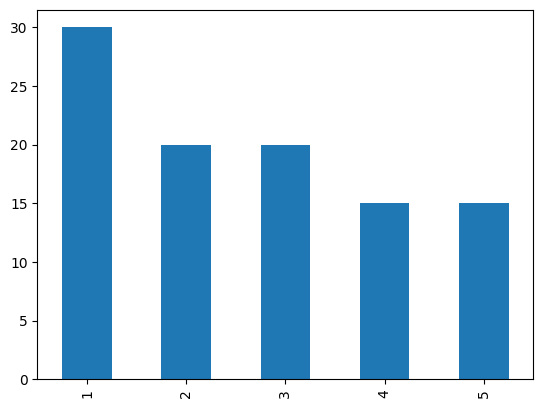

In [43]:
pd.Series(x1).value_counts(sort=False).plot(kind = 'bar')

<Axes: >

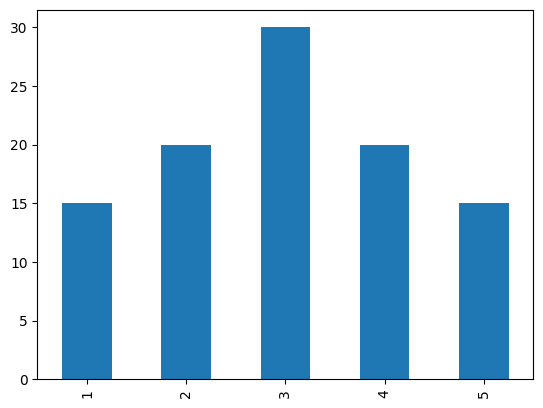

In [41]:
pd.Series(x2).value_counts(sort=False).plot(kind = 'bar')

<Axes: >

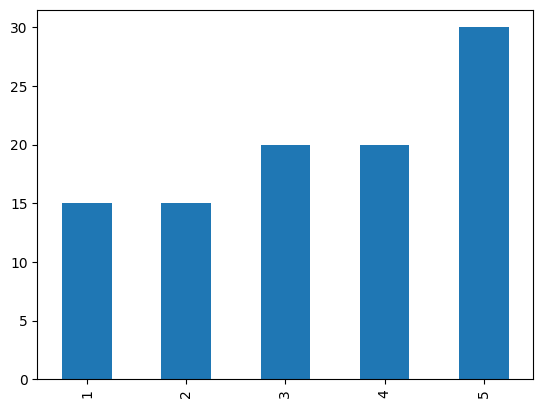

In [42]:
pd.Series(x3).value_counts(sort=False).plot(kind = 'bar')

In [44]:
print("좌로 치우쳤을 때 왜도:", stats.skew(x1))
print("치우치지 않았을 때 왜도:", stats.skew(x2))
print("우로 치우친 왜도:", stats.skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


#### 첨도 계산

In [65]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

<Axes: >

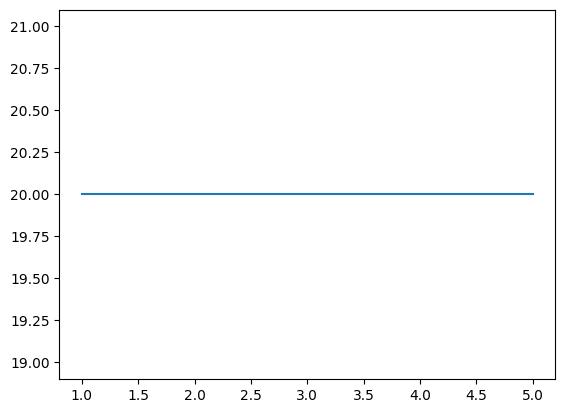

In [60]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'line')

<Axes: >

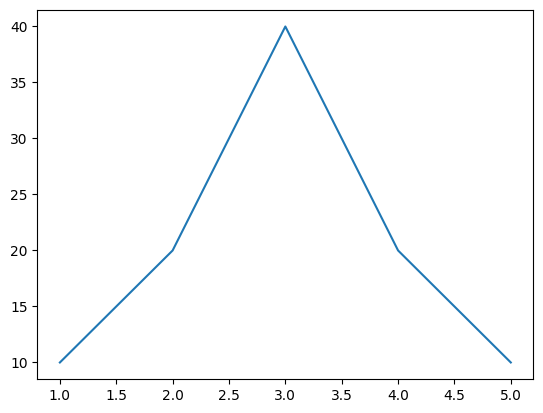

In [61]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'line')

<Axes: >

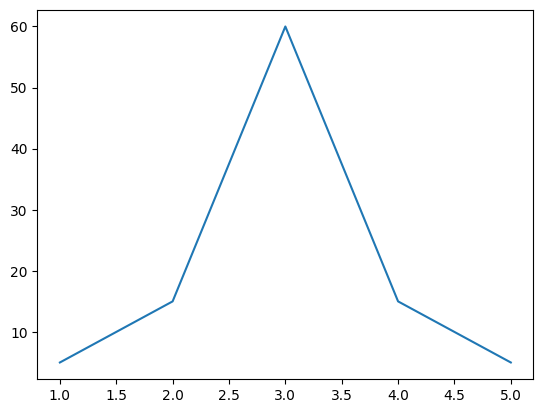

In [66]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'line')

In [64]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", stats.kurtosis(x1))
print("조금 뾰족할 때 첨도:", stats.kurtosis(x2))
print("매우 뾰족할 때 첨도:", stats.kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.4375


In [67]:
# 매우 뾰족한 첨도 값 확인 
print("매우 뾰족할 때 첨도:", stats.kurtosis(x3))

매우 뾰족할 때 첨도: 0.8775510204081636


# 비즈니스 활용 사례

In [72]:
"""
1000명의 고객 구매금액 데이터를 가상으로 생성하고,

한쪽은 오른쪽으로 긴 꼬리(양의 왜도, +)
다른 한쪽은 왼쪽으로 긴 꼬리(음의 왜도, −)
로 만들어 **히스토그램 + 커널밀도곡선(KDE)**으로 시각화하는 코드입니다.
"""

'\n1000명의 고객 구매금액 데이터를 가상으로 생성하고,\n\n한쪽은 오른쪽으로 긴 꼬리(양의 왜도, +)\n다른 한쪽은 왼쪽으로 긴 꼬리(음의 왜도, −)\n로 만들어 **히스토그램 + 커널밀도곡선(KDE)**으로 시각화하는 코드입니다.\n'

📊 통계 요약
--------------------------------------------------
[오른쪽 꼬리 (+)]  왜도: 1.87   첨도: 5.22
[왼쪽 꼬리 (−)]   왜도: -1.99   첨도: 5.24
--------------------------------------------------


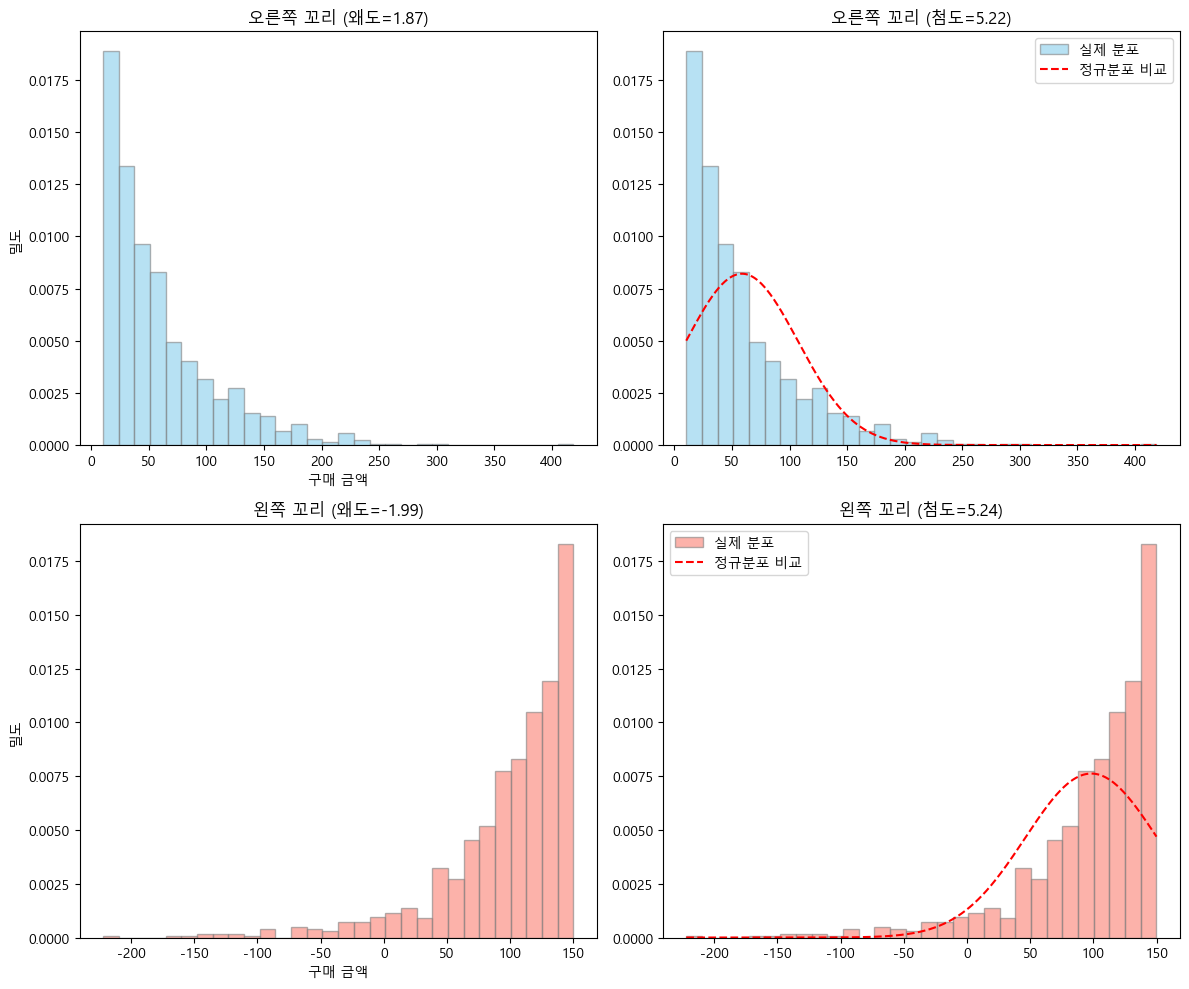

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import warnings

# --------------------------------------------------
# 한글 깨짐 방지 & 경고 무시
# --------------------------------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

# --------------------------------------------------
# 데이터 생성
# --------------------------------------------------
np.random.seed(42)

# 오른쪽 꼬리 (양의 왜도)
right_skewed = np.random.exponential(scale=50, size=1000) + 10

# 왼쪽 꼬리 (음의 왜도)
left_skewed = 150 - np.random.exponential(scale=50, size=1000)

# --------------------------------------------------
# 왜도, 첨도 계산
# --------------------------------------------------
right_skew = skew(right_skewed)
left_skew = skew(left_skewed)
right_kurt = kurtosis(right_skewed)
left_kurt = kurtosis(left_skewed)

# --------------------------------------------------
# 통계값 출력
# --------------------------------------------------
print("📊 통계 요약")
print("-" * 50)
print(f"[오른쪽 꼬리 (+)]  왜도: {right_skew:.2f}   첨도: {right_kurt:.2f}")
print(f"[왼쪽 꼬리 (−)]   왜도: {left_skew:.2f}   첨도: {left_kurt:.2f}")
print("-" * 50)

# --------------------------------------------------
# 시각화
# --------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ---------- (1,1) 오른쪽 꼬리: 왜도 ----------
axes[0, 0].hist(right_skewed, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='gray')
axes[0, 0].set_title(f"오른쪽 꼬리 (왜도={right_skew:.2f})")
axes[0, 0].set_xlabel("구매 금액")
axes[0, 0].set_ylabel("밀도")

# ---------- (1,2) 오른쪽 꼬리: 첨도 ----------
x = np.linspace(min(right_skewed), max(right_skewed), 1000)
norm_pdf = norm.pdf(x, np.mean(right_skewed), np.std(right_skewed))
axes[0, 1].hist(right_skewed, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='gray', label="실제 분포")
axes[0, 1].plot(x, norm_pdf, 'r--', label="정규분포 비교")
axes[0, 1].set_title(f"오른쪽 꼬리 (첨도={right_kurt:.2f})")
axes[0, 1].legend()

# ---------- (2,1) 왼쪽 꼬리: 왜도 ----------
axes[1, 0].hist(left_skewed, bins=30, density=True, alpha=0.6, color='salmon', edgecolor='gray')
axes[1, 0].set_title(f"왼쪽 꼬리 (왜도={left_skew:.2f})")
axes[1, 0].set_xlabel("구매 금액")
axes[1, 0].set_ylabel("밀도")

# ---------- (2,2) 왼쪽 꼬리: 첨도 ----------
x = np.linspace(min(left_skewed), max(left_skewed), 1000)
norm_pdf = norm.pdf(x, np.mean(left_skewed), np.std(left_skewed))
axes[1, 1].hist(left_skewed, bins=30, density=True, alpha=0.6, color='salmon', edgecolor='gray', label="실제 분포")
axes[1, 1].plot(x, norm_pdf, 'r--', label="정규분포 비교")
axes[1, 1].set_title(f"왼쪽 꼬리 (첨도={left_kurt:.2f})")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


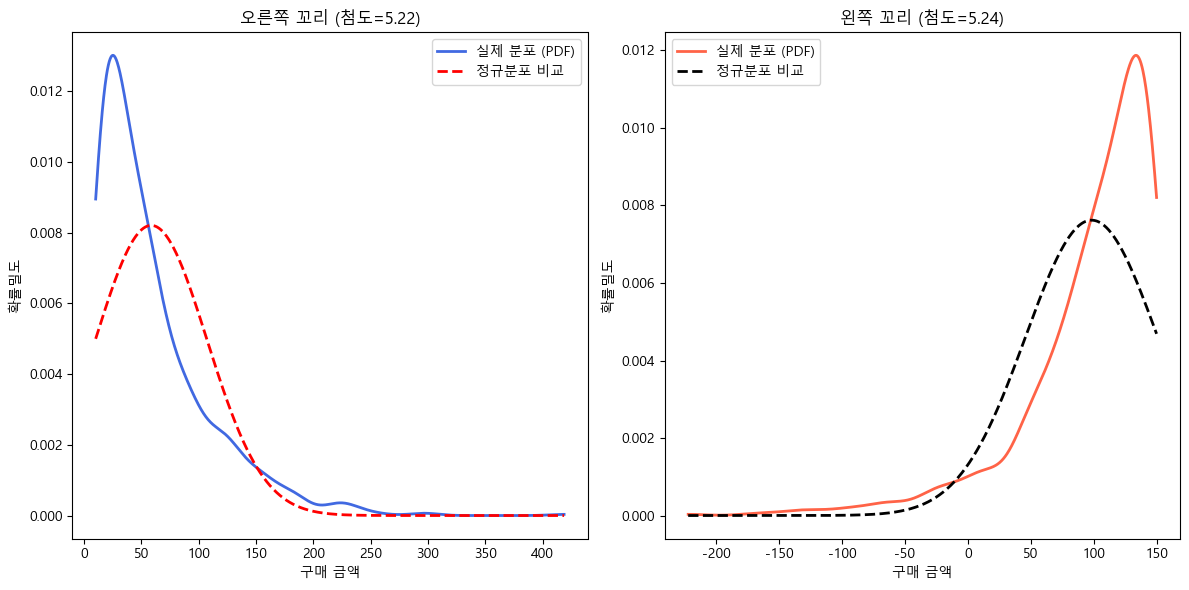

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm, kurtosis
import warnings

# --------------------------------------------------
# 한글 폰트 및 경고 설정
# --------------------------------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

# --------------------------------------------------
# 데이터 생성
# --------------------------------------------------
np.random.seed(42)

# 오른쪽 꼬리 (양의 왜도)
right_skewed = np.random.exponential(scale=50, size=1000) + 10

# 왼쪽 꼬리 (음의 왜도)
left_skewed = 150 - np.random.exponential(scale=50, size=1000)

# --------------------------------------------------
# 첨도 계산
# --------------------------------------------------
right_kurt = kurtosis(right_skewed)
left_kurt = kurtosis(left_skewed)

# --------------------------------------------------
# 확률밀도함수(PDF) 계산
# --------------------------------------------------
x_r = np.linspace(min(right_skewed), max(right_skewed), 1000)
x_l = np.linspace(min(left_skewed), max(left_skewed), 1000)

kde_r = gaussian_kde(right_skewed)
kde_l = gaussian_kde(left_skewed)

pdf_r = kde_r(x_r)
pdf_l = kde_l(x_l)

# 동일한 평균·표준편차의 정규분포 비교용 PDF
norm_r = norm.pdf(x_r, np.mean(right_skewed), np.std(right_skewed))
norm_l = norm.pdf(x_l, np.mean(left_skewed), np.std(left_skewed))

# --------------------------------------------------
# 시각화
# --------------------------------------------------
plt.figure(figsize=(12, 6))

# 오른쪽 꼬리 (양의 왜도)
plt.subplot(1, 2, 1)
plt.plot(x_r, pdf_r, label='실제 분포 (PDF)', color='royalblue', linewidth=2)
plt.plot(x_r, norm_r, '--', label='정규분포 비교', color='red', linewidth=2)
plt.title(f"오른쪽 꼬리 (첨도={right_kurt:.2f})")
plt.xlabel("구매 금액")
plt.ylabel("확률밀도")
plt.legend()

# 왼쪽 꼬리 (음의 왜도)
plt.subplot(1, 2, 2)
plt.plot(x_l, pdf_l, label='실제 분포 (PDF)', color='tomato', linewidth=2)
plt.plot(x_l, norm_l, '--', label='정규분포 비교', color='black', linewidth=2)
plt.title(f"왼쪽 꼬리 (첨도={left_kurt:.2f})")
plt.xlabel("구매 금액")
plt.ylabel("확률밀도")
plt.legend()

plt.tight_layout()
plt.show()


In [75]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
